In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import predictor_of_investment_helper_methods as hm

In [2]:
case = "IEE118_mod1"

In [3]:
net_dem_ph = hm.get_net_dem_FY(case)
sorted_net_dem_ph = -np.sort(-net_dem_ph.to_numpy())

FileNotFoundError: [Errno 2] No such file or directory: 'A.The_full_year_MILP/IEE118_mod1/2.Par/oT_Data_Demand_IEE118_mod1.csv'

In [ ]:
# List of different values to use instead of "R&D"
cms = ["R&D", "OPC","OPT_LB","CHI","HI"]
nbcs = [10,50,100,150]
# Create a new figure
plt.figure(figsize=(10, 6))

cm = "R&D"
nbc = 50
# Loop through each department, get the data, and plot it
#for cm in cms:
for nbc in nbcs:
    # Get the data for each department and case
    df_net_dem = hm.get_net_dem_cm(cm, nbc, case)
    np_net_dem = df_net_dem["NetDemand"].to_numpy()
    
    # Sort in descending order
    sorted_util = -np.sort(-np_net_dem)
    
    #Calculate MAE
    MAE = np.mean(np.abs(sorted_util-sorted_net_dem_ph))
    
    
    # Plot the sorted data
    plt.plot(sorted_util, label=(cm,nbc,MAE))

# Add the full year     

plt.plot(sorted_net_dem_ph, label="Full year")

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Utility')
plt.title(' Utilities for Different Departments')
plt.legend(title="Clustering methood")
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
case = "IEEE118_mod1"

net_dem_ph = hm.get_net_dem_FY(case)
sorted_net_dem_ph = -np.sort(-net_dem_ph.to_numpy())
# List of different values to use instead of "R&D"
cms = ["R&D", "OPC","OPT_LB","CHI","HI"]
nbcs = [10,50,100,150]
nbcs = [(i+1)*10 for i in range (15)]
#nbcs = [(i+1)*10 for i in range (10)] + [150,200,250,300,350,400]
df_mae = pd.DataFrame()
i=0
for cm in cms:
    for nbc in nbcs:
        # Get the data for each department and case
        df_net_dem = hm.get_net_dem_cm(cm, nbc, case)
        np_net_dem = df_net_dem["NetDemand"].to_numpy()

        # Sort in descending order
        sorted_util = -np.sort(-np_net_dem)

        #Calculate MAE
        MAE = np.mean(np.abs(sorted_util-sorted_net_dem_ph))

        this_df = pd.DataFrame({"CM":cm,"nbc":nbc,"MAE":MAE},index = [i])
        df_mae = pd.concat([df_mae,this_df])
        i+=1

<Axes: xlabel='nbc', ylabel='MAE'>

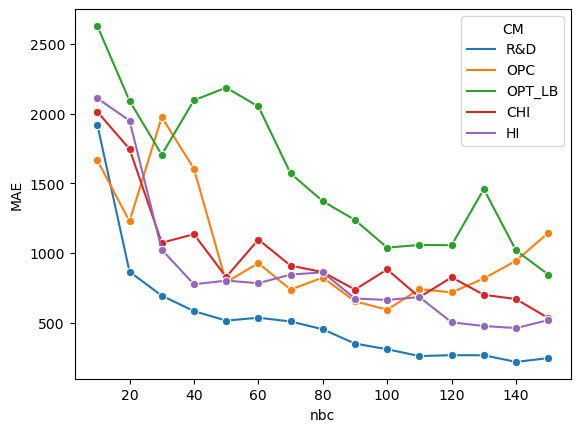

In [18]:
sns.lineplot(data = df_mae,x = "nbc", y = "MAE",hue = "CM",marker = "o")

In [19]:
df_mae[df_mae["nbc"] == 100]

,CM,nbc,MAE
9,R&D,100,308.313742
24,OPC,100,592.158813
39,OPT_LB,100,1037.823177
54,CHI,100,881.020409
69,HI,100,662.285503
